In [1]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


gene clusters-- peak clusters, expression_df-- ocr_df, gene expression accessibility

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Schritt 1: CSV-Daten laden
df = pd.read_csv("./data/ATAC.csv", index_col=0, on_bad_lines='skip')

# Schritt 2: Übersicht anschauen (optional)
print(df.head())

# Schritt 3: Zellnamen herausfiltern → Nur Spalten mit ILC
ilc_columns = [col for col in df.columns if col.startswith("ILC")]

# Schritt 4: OCR-Signalmatrix extrahieren
ocr_matrix = df[ilc_columns]

ocr_matrix

                      chrom   Summit  mm10.60way.phastCons_scores  \
ImmGenATAC1219.peakID                                               
ImmGenATAC1219.peak_1  chr1  3020786                         0.00   
ImmGenATAC1219.peak_2  chr1  3087226                         0.00   
ImmGenATAC1219.peak_3  chr1  3120109                         0.07   
ImmGenATAC1219.peak_4  chr1  3121485                         0.15   
ImmGenATAC1219.peak_5  chr1  3372787                         0.03   

                       _-log10_bestPvalue  Included.in.systematic.analysis  \
ImmGenATAC1219.peakID                                                        
ImmGenATAC1219.peak_1                0.56                              NaN   
ImmGenATAC1219.peak_2                0.50                              NaN   
ImmGenATAC1219.peak_3               10.80                              1.0   
ImmGenATAC1219.peak_4                3.02                              1.0   
ImmGenATAC1219.peak_5                1.31       

,ILC2.SI,ILC3.NKp46-CCR6-.SI,ILC3.NKp46+.SI,ILC3.CCR6+.SI
ImmGenATAC1219.peakID,,,,
ImmGenATAC1219.peak_1,1.79,1.67,0.75,1.21
ImmGenATAC1219.peak_2,1.29,3.87,0.23,0.15
ImmGenATAC1219.peak_3,0.44,2.49,0.23,0.95
ImmGenATAC1219.peak_4,1.76,0.95,0.23,0.15
ImmGenATAC1219.peak_5,1.43,0.15,2.14,0.15
...,...,...,...,...
ImmGenATAC1219.peak_512591,5.91,4.59,8.75,7.61
ImmGenATAC1219.peak_512592,8.90,5.36,6.68,9.16
ImmGenATAC1219.peak_512593,2.68,4.14,4.70,4.81


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

ocr_df = pd.read_csv("./data/ATAC.csv", usecols = ["NK.27+11b-.BM","NK.27+11b+.BM","NK.27-11b+.BM","NK.27+11b-.Sp","NK.27+11b+.Sp","NK.27-11b+.Sp","ILC2.SI", "ILC3.NKp46-CCR6-.SI", "ILC3.NKp46+.SI", "ILC3.CCR6+.SI"])
ocr_df.head()

,NK.27+11b-.BM,NK.27+11b+.BM,NK.27-11b+.BM,NK.27+11b-.Sp,NK.27+11b+.Sp,NK.27-11b+.Sp,ILC2.SI,ILC3.NKp46-CCR6-.SI,ILC3.NKp46+.SI,ILC3.CCR6+.SI
0,0.82,0.22,2.00,0.81,2.43,1.27,1.79,1.67,0.75,1.21
1,1.46,0.22,0.12,0.14,0.20,0.12,1.29,3.87,0.23,0.15
2,0.20,1.00,0.12,0.14,1.58,0.12,0.44,2.49,0.23,0.95
3,1.72,1.07,0.73,0.76,0.20,1.27,1.76,0.95,0.23,0.15
4,0.20,0.22,0.12,0.14,0.20,1.29,1.43,0.15,2.14,0.15


In [4]:
scaler = StandardScaler()
scaled_accessibility = scaler.fit_transform(ocr_df)

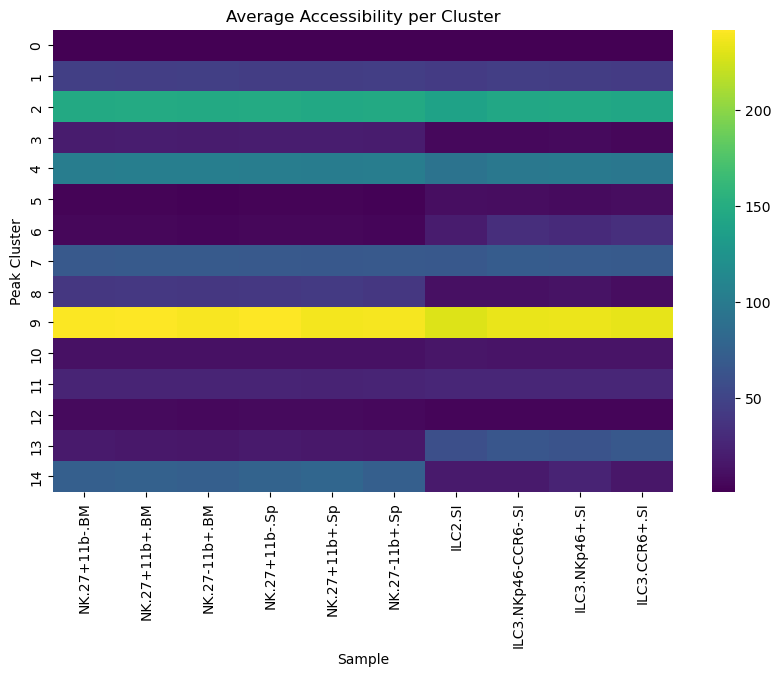

In [5]:


# 3. Run k-means clustering (you can tune the number of clusters)
k = 15  # change depending on your dataset
kmeans = KMeans(n_clusters=k, random_state=42)
peak_clusters = kmeans.fit_predict(scaled_accessibility)

# 4. Add cluster labels back to the dataframe
ocr_df['Cluster'] = peak_clusters

# 5. Optional: visualize average accessibility per cluster
cluster_mean = ocr_df.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_mean, cmap="viridis")
plt.title("Average Accessibility per Cluster")
plt.xlabel("Sample")
plt.ylabel("Peak Cluster")
plt.show()

In [6]:
print(ocr_df['Cluster'].value_counts())

Cluster
0     407042
12     38422
5      23212
10     14516
3       8065
11      6607
6       3734
1       3341
8       2849
7       1838
13       984
4        855
14       788
2        308
9         34
Name: count, dtype: int64


In [7]:
# Plotting the clusters 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = pd.read_csv("./data/ATAC.csv", usecols = ["NK.27+11b-.BM","NK.27+11b+.BM","NK.27-11b+.BM","NK.27+11b-.Sp","NK.27+11b+.Sp","NK.27-11b+.Sp","ILC2.SI", "ILC3.NKp46-CCR6-.SI", "ILC3.NKp46+.SI", "ILC3.CCR6+.SI"])
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape

(512595, 2)

In [8]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 15)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 0 0 ... 0 0 0]


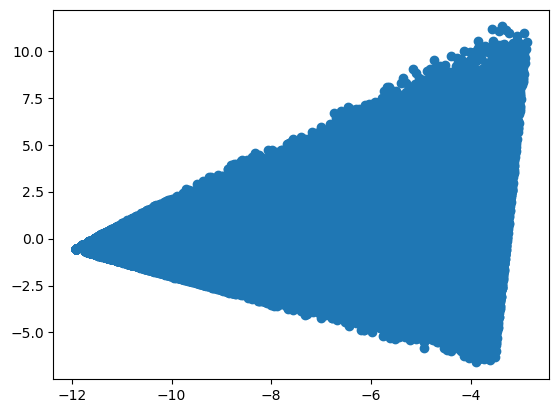

In [9]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

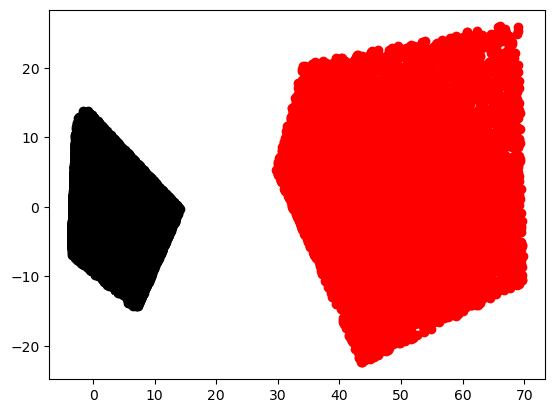

In [10]:
#filter rows of original data
filtered_label2 = df[label == 2]
 
filtered_label8 = df[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

/Users/kaloyan.kostadinov/miniconda3/envs/data_analysis/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


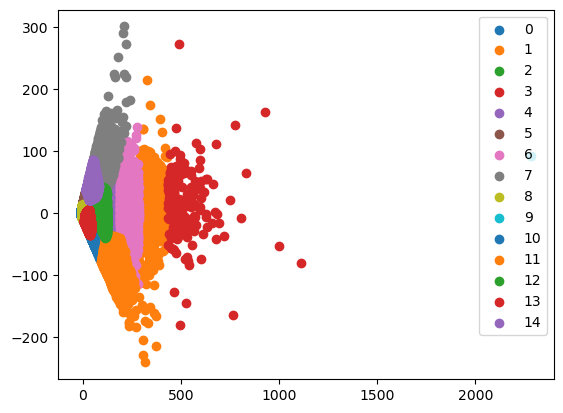

In [11]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()